<a href="https://colab.research.google.com/github/saishshinde15/Voice-Analysis-For-Parkinson-s-Disease/blob/main/Voice_analysis_for_Parkinsons's_Disease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [53]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras import layers, models, callbacks
from scipy.io import arff
from io import StringIO
import librosa
import tensorflow as tf

In [2]:
data_path = "/content/php4ylQmK.arff"

In [4]:
# Load ARFF file
with open(data_path, "r") as f:
    data, meta = arff.loadarff(f)

In [5]:
# Convert to DataFrame
df = pd.DataFrame(data)

In [6]:
# Extract features and labels
X = df.drop(columns=[df.columns[-1]]).values
y = df[df.columns[-1]].values

In [7]:
# Convert labels to binary (0 and 1)
le = LabelEncoder()
y = le.fit_transform(y)

In [9]:
# Function to extract features from audio files
def extract_features(audio_data):

    # Example: extract MFCC features using librosa

    features = []
    for sample in audio_data:
        mfccs = librosa.feature.mfcc(y=sample, sr=16000, n_mfcc=22)
        mfccs_processed = np.mean(mfccs.T, axis=0)  # Normalize
        features.append(mfccs_processed)
    return np.array(features)

In [10]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
# Extract features from audio data
X_train_features = extract_features(X_train)
X_test_features = extract_features(X_test)

/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=22
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=22
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=22
  warnings.warn(


In [14]:
model = models.Sequential([
    layers.Input(shape=(X_train_features.shape[1],)),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')
])

In [16]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [17]:
# Define callbacks (e.g., early stopping)
early_stopping = callbacks.EarlyStopping(monitor='val_loss', patience=3)

In [18]:
history = model.fit(X_train_features, y_train, validation_split=0.2, epochs=20, batch_size=32, callbacks=[early_stopping])

Epoch 1/20
4/4 [==============================] - 2s 363ms/step - loss: 39.1259 - accuracy: 0.4516 - val_loss: 7.6793 - val_accuracy: 0.7812
Epoch 2/20
4/4 [==============================] - 0s 15ms/step - loss: 27.8003 - accuracy: 0.6048 - val_loss: 12.1130 - val_accuracy: 0.7812
Epoch 3/20
4/4 [==============================] - 0s 13ms/step - loss: 27.4563 - accuracy: 0.6452 - val_loss: 11.3663 - val_accuracy: 0.7812
Epoch 4/20
4/4 [==============================] - 0s 17ms/step - loss: 22.2372 - accuracy: 0.6371 - val_loss: 9.6912 - val_accuracy: 0.7812


In [42]:
model1_eval=loss, accuracy = model.evaluate(X_test_features, y_test)
print(f"Test Accuracy: {accuracy}")

2/2 [==============================] - 0s 206ms/step - loss: 8.0050 - accuracy: 0.8205
Test Accuracy: 0.8205128312110901


In [22]:
# Save the model
model.save("parkinson_detection_model.keras")

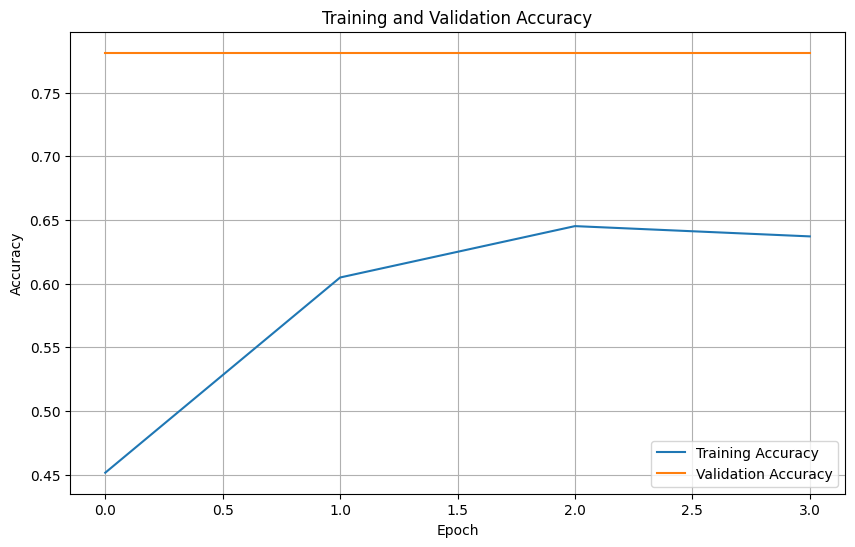

In [24]:
# Plot training and validation accuracy
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

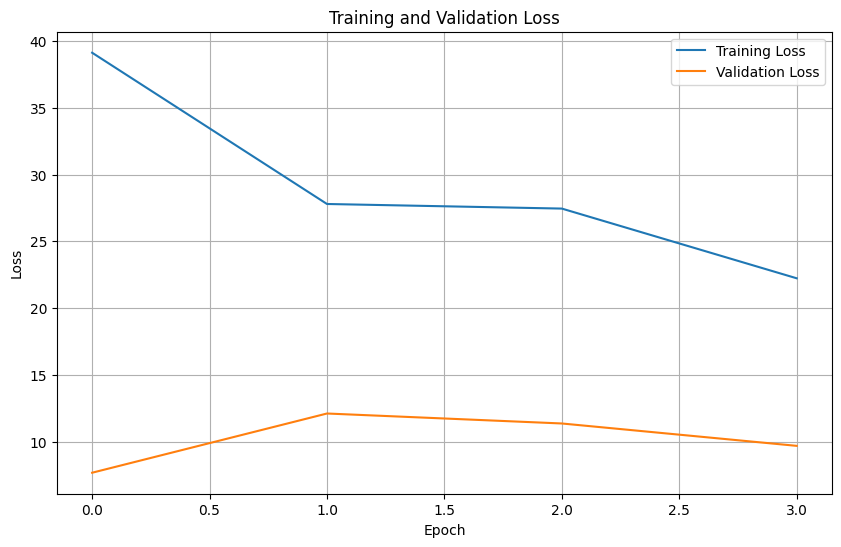

In [25]:
# Plot training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

In [85]:
# Make predictions
predictions = model.predict(X_test_features)

# Convert probabilities to binary labels
predicted_labels = np.round(predictions).astype(int)

# Print the predicted labels and corresponding probabilities
for i in range(len(predicted_labels)):
    print("Sample:", i)
    print("Predicted Label:", predicted_labels[i])
    print("Probability of Parkinson's Disease:", predictions[i])
    print()



2/2 [==============================] - 0s 75ms/step
Sample: 0
Predicted Label: [1]
Probability of Parkinson's Disease: [1.]

Sample: 1
Predicted Label: [1]
Probability of Parkinson's Disease: [1.]

Sample: 2
Predicted Label: [1]
Probability of Parkinson's Disease: [1.]

Sample: 3
Predicted Label: [1]
Probability of Parkinson's Disease: [1.]

Sample: 4
Predicted Label: [1]
Probability of Parkinson's Disease: [1.]

Sample: 5
Predicted Label: [1]
Probability of Parkinson's Disease: [1.]

Sample: 6
Predicted Label: [1]
Probability of Parkinson's Disease: [1.]

Sample: 7
Predicted Label: [1]
Probability of Parkinson's Disease: [1.]

Sample: 8
Predicted Label: [1]
Probability of Parkinson's Disease: [1.]

Sample: 9
Predicted Label: [1]
Probability of Parkinson's Disease: [1.]

Sample: 10
Predicted Label: [1]
Probability of Parkinson's Disease: [1.]

Sample: 11
Predicted Label: [1]
Probability of Parkinson's Disease: [1.]

Sample: 12
Predicted Label: [1]
Probability of Parkinson's Disease: [1

##Lets Try to Increase the accuarcy of the model by incresing the epochs and units per *layer*

In [36]:
model2 = models.Sequential([
    layers.Input(shape=(X_train_features.shape[1],)),
    layers.Dense(256, activation='relu'),  # Increased units
    layers.Dropout(0.5),
    layers.Dense(128, activation='relu'),  # Increased units
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')
])

In [37]:
model2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [38]:
early_stopping = callbacks.EarlyStopping(monitor='val_loss', patience=5)

In [39]:
history2 = model2.fit(X_train_features, y_train, validation_split=0.2, epochs=50, batch_size=32, callbacks=[early_stopping])

Epoch 1/50
4/4 [==============================] - 3s 791ms/step - loss: 18.5630 - accuracy: 0.5323 - val_loss: 6.3733 - val_accuracy: 0.7812
Epoch 2/50
4/4 [==============================] - 0s 26ms/step - loss: 20.9035 - accuracy: 0.5323 - val_loss: 6.9008 - val_accuracy: 0.7812
Epoch 3/50
4/4 [==============================] - 0s 27ms/step - loss: 19.3050 - accuracy: 0.6129 - val_loss: 4.9260 - val_accuracy: 0.7812
Epoch 4/50
4/4 [==============================] - 0s 21ms/step - loss: 13.9216 - accuracy: 0.6210 - val_loss: 1.4763 - val_accuracy: 0.7812
Epoch 5/50
4/4 [==============================] - 0s 25ms/step - loss: 11.0441 - accuracy: 0.6129 - val_loss: 2.3837 - val_accuracy: 0.7812
Epoch 6/50
4/4 [==============================] - 0s 22ms/step - loss: 14.7550 - accuracy: 0.6532 - val_loss: 2.5462 - val_accuracy: 0.7812
Epoch 7/50
4/4 [==============================] - 0s 24ms/step - loss: 9.7567 - accuracy: 0.6048 - val_loss: 2.1515 - val_accuracy: 0.7812
Epoch 8/50
4/4 [====

In [45]:
model2.save("parkinson_detection_model2.keras")

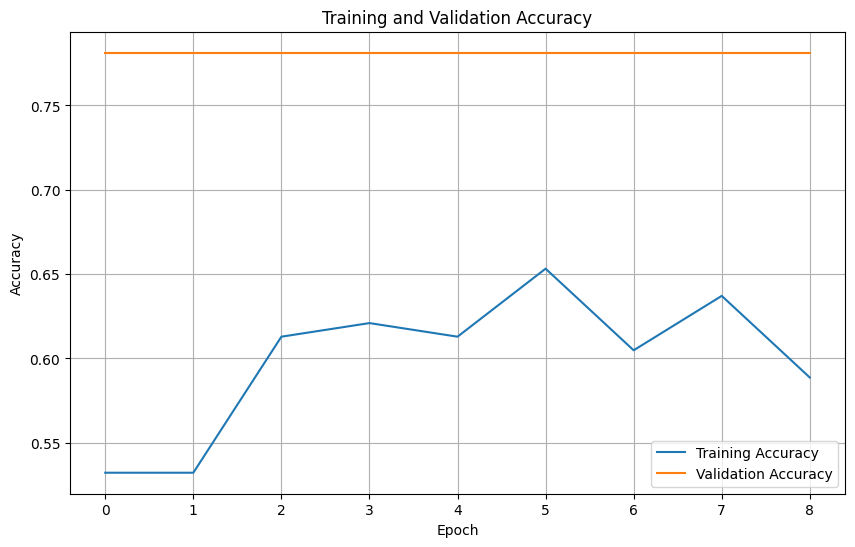

In [48]:
plt.figure(figsize=(10, 6))
plt.plot(history2.history['accuracy'], label='Training Accuracy')
plt.plot(history2.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

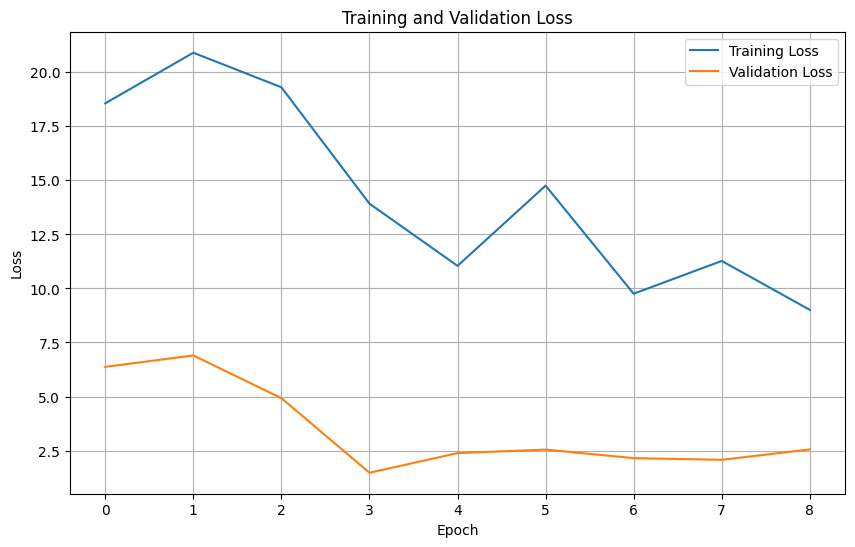

In [49]:
plt.figure(figsize=(10, 6))
plt.plot(history2.history['loss'], label='Training Loss')
plt.plot(history2.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

In [41]:
model2_eval=loss, accuracy = model2.evaluate(X_test_features, y_test)
print(f"Test Accuracy: {accuracy}")


2/2 [==============================] - 0s 9ms/step - loss: 2.2083 - accuracy: 0.8205
Test Accuracy: 0.8205128312110901


In [43]:
model_result=(['model 1', model1_eval],
              ['model 2',model2_eval])

In [44]:
model_result

(['model 1', [8.00495719909668, 0.8205128312110901]],
 ['model 2', [2.2083232402801514, 0.8205128312110901]])

In [86]:
# Make predictions
predictions = model2.predict(X_test_features)

# Convert probabilities to binary labels
predicted_labels = np.round(predictions).astype(int)

# Print the predicted labels and corresponding probabilities
for i in range(len(predicted_labels)):
    print("Sample:", i)
    print("Predicted Label:", predicted_labels[i])
    print("Probability of Parkinson's Disease:", predictions[i])
    print()

2/2 [==============================] - 0s 7ms/step
Sample: 0
Predicted Label: [1]
Probability of Parkinson's Disease: [0.9999911]

Sample: 1
Predicted Label: [1]
Probability of Parkinson's Disease: [0.9999904]

Sample: 2
Predicted Label: [1]
Probability of Parkinson's Disease: [0.999992]

Sample: 3
Predicted Label: [1]
Probability of Parkinson's Disease: [0.99998754]

Sample: 4
Predicted Label: [1]
Probability of Parkinson's Disease: [0.99999845]

Sample: 5
Predicted Label: [1]
Probability of Parkinson's Disease: [0.99999666]

Sample: 6
Predicted Label: [1]
Probability of Parkinson's Disease: [0.99998987]

Sample: 7
Predicted Label: [1]
Probability of Parkinson's Disease: [0.9999995]

Sample: 8
Predicted Label: [1]
Probability of Parkinson's Disease: [0.99999213]

Sample: 9
Predicted Label: [1]
Probability of Parkinson's Disease: [0.9999846]

Sample: 10
Predicted Label: [1]
Probability of Parkinson's Disease: [0.99999964]

Sample: 11
Predicted Label: [1]
Probability of Parkinson's Dise

### We can see even if the the accuarcy is the same the loss has decreased making the second model better than first model

##Lets get more gready and try to get the loss more lower by changing the learning rate

In [50]:
model3 = models.Sequential([
    layers.Input(shape=(X_train_features.shape[1],)),
    layers.Dense(256, activation='relu'),  # Increased units
    layers.Dropout(0.5),
    layers.Dense(128, activation='relu'),  # Increased units
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')
])

In [74]:
model3.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])


In [75]:
early_stopping = callbacks.EarlyStopping(monitor='val_loss', patience=5)

In [76]:
history3 = model3.fit(X_train_features, y_train, validation_split=0.2, epochs=50, batch_size=32, callbacks=[early_stopping])


Epoch 1/50
4/4 [==============================] - 3s 277ms/step - loss: 0.7090 - accuracy: 0.7339 - val_loss: 0.6246 - val_accuracy: 0.7812
Epoch 2/50
4/4 [==============================] - 0s 19ms/step - loss: 0.7001 - accuracy: 0.7097 - val_loss: 0.6245 - val_accuracy: 0.7812
Epoch 3/50
4/4 [==============================] - 0s 14ms/step - loss: 0.7017 - accuracy: 0.6694 - val_loss: 0.6244 - val_accuracy: 0.7812
Epoch 4/50
4/4 [==============================] - 0s 14ms/step - loss: 0.7810 - accuracy: 0.7177 - val_loss: 0.6243 - val_accuracy: 0.7812
Epoch 5/50
4/4 [==============================] - 0s 19ms/step - loss: 0.6256 - accuracy: 0.6935 - val_loss: 0.6241 - val_accuracy: 0.7812
Epoch 6/50
4/4 [==============================] - 0s 14ms/step - loss: 0.7232 - accuracy: 0.7097 - val_loss: 0.6239 - val_accuracy: 0.7812
Epoch 7/50
4/4 [==============================] - 0s 13ms/step - loss: 0.7383 - accuracy: 0.7016 - val_loss: 0.6238 - val_accuracy: 0.7812
Epoch 8/50
4/4 [==========

In [81]:
model3.save("parkinson_detection_model3.keras")

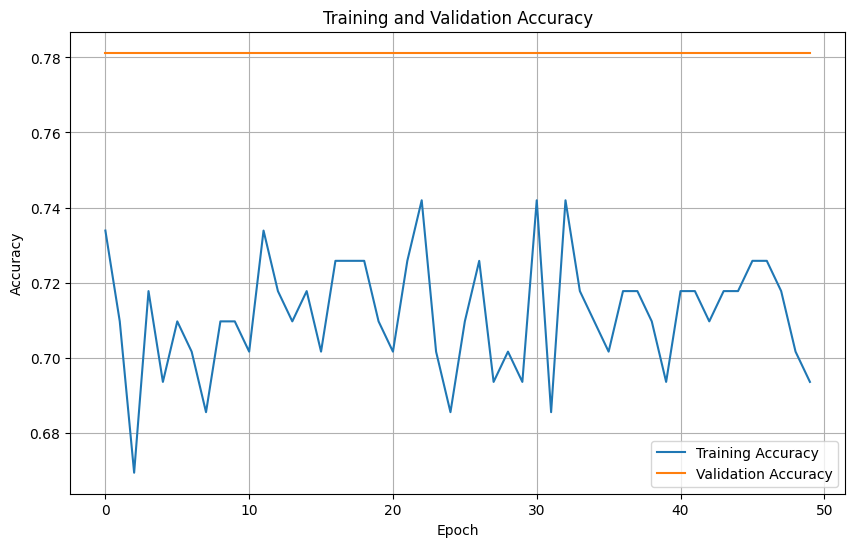

In [82]:
plt.figure(figsize=(10, 6))
plt.plot(history3.history['accuracy'], label='Training Accuracy')
plt.plot(history3.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

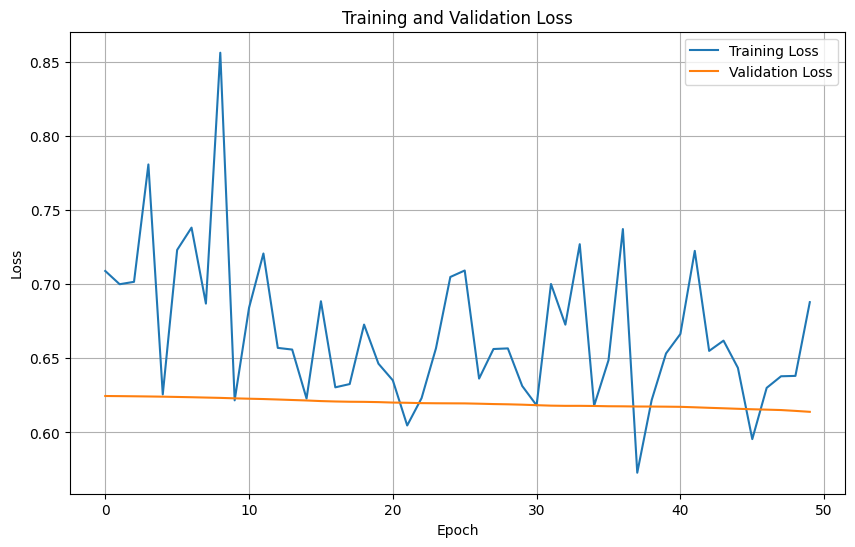

In [83]:
plt.figure(figsize=(10, 6))
plt.plot(history3.history['loss'], label='Training Loss')
plt.plot(history3.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

In [78]:
model3_eval=loss, accuracy = model3.evaluate(X_test_features, y_test)
print(f"Test Accuracy: {accuracy}")

2/2 [==============================] - 1s 528ms/step - loss: 0.5960 - accuracy: 0.8205
Test Accuracy: 0.8205128312110901


In [79]:
model_result=(['model 1', model1_eval],
              ['model 2',model2_eval],
              ['model 3',model3_eval])

In [80]:
model_result

(['model 1', [8.00495719909668, 0.8205128312110901]],
 ['model 2', [2.2083232402801514, 0.8205128312110901]],
 ['model 3', [0.596045970916748, 0.8205128312110901]])

## We have final created a model with low loss my tuning the learning rate(the reason chossing 0.0001 as learning rate was that the default learning rate of adam optimerzer is 0.001 and after the checking the loss graph of model 2 , the loss was in zig zag manner which indicated mathematically to decrease the learning rate) making model 3 the best model with respect to the loss

In [87]:
# Make predictions
predictions = model3.predict(X_test_features)

# Convert probabilities to binary labels
predicted_labels = np.round(predictions).astype(int)

# Print the predicted labels and corresponding probabilities
for i in range(len(predicted_labels)):
    print("Sample:", i)
    print("Predicted Label:", predicted_labels[i])
    print("Probability of Parkinson's Disease:", predictions[i])
    print()

2/2 [==============================] - 0s 328ms/step
Sample: 0
Predicted Label: [1]
Probability of Parkinson's Disease: [0.5728798]

Sample: 1
Predicted Label: [1]
Probability of Parkinson's Disease: [0.59966826]

Sample: 2
Predicted Label: [1]
Probability of Parkinson's Disease: [0.5728798]

Sample: 3
Predicted Label: [1]
Probability of Parkinson's Disease: [0.5728798]

Sample: 4
Predicted Label: [1]
Probability of Parkinson's Disease: [0.5947108]

Sample: 5
Predicted Label: [1]
Probability of Parkinson's Disease: [0.5728798]

Sample: 6
Predicted Label: [1]
Probability of Parkinson's Disease: [0.5728798]

Sample: 7
Predicted Label: [1]
Probability of Parkinson's Disease: [0.60224813]

Sample: 8
Predicted Label: [1]
Probability of Parkinson's Disease: [0.5728798]

Sample: 9
Predicted Label: [1]
Probability of Parkinson's Disease: [0.5728798]

Sample: 10
Predicted Label: [1]
Probability of Parkinson's Disease: [0.60260916]

Sample: 11
Predicted Label: [1]
Probability of Parkinson's Dise

### Seeing the predicted of model 2 was is far superior compaired to model 3 , even though model 3 has low loss but the model 2 has great prediction capibilies with low loss hence we will choose Model 2 the best model overall